In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j1, jn, yn  # jn y yn son las funciones Bessel de primer y segundo tipo
from scipy.ndimage import gaussian_filter

# Comparación PSF (gráfica)

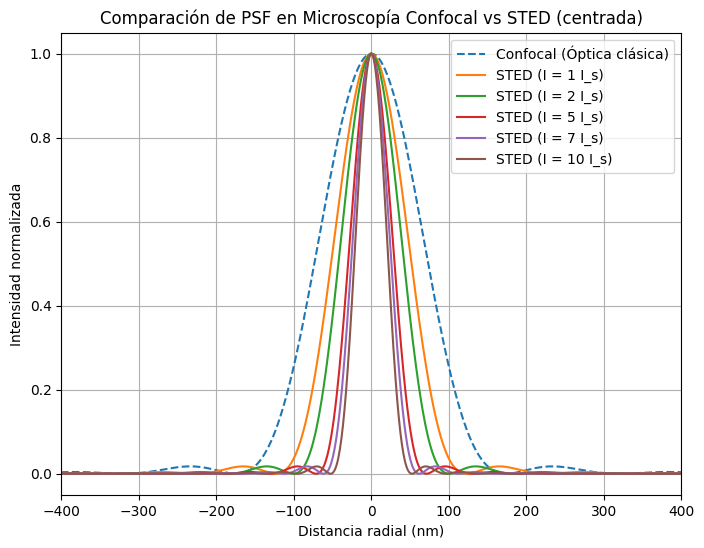

In [2]:
# Parámetros originales
wavelength = 400e-9  # Longitud de onda (400 nm)
NA = 1.4
I_s = 1
I_values = [1,2,5,7,10]

# Definición de PSF clásica
def classica(r, wavelength, NA):
    k = 2 * np.pi / wavelength
    r_norm = k * NA * r
    return (2 * j1(r_norm) / r_norm) ** 2

# Definición de PSF STED
def sted(r, wavelength, NA, I, I_s):
    factor = np.sqrt(1 + I / I_s)
    k = 2 * np.pi / wavelength
    r_norm = k * NA * r * factor
    return (2 * j1(r_norm) / r_norm) ** 2

def compute_fwhm(r, psf):
    # Considera solo la mitad positiva del eje
    pos_indices = r >= 0
    r_pos = r[pos_indices]
    psf_pos = psf[pos_indices]
    
    half_max = np.max(psf_pos) / 2.0

    # Buscar el primer índice donde la PSF cae por debajo de half_max
    idx = np.where(psf_pos < half_max)[0]
    if idx.size == 0:
        return None
    i = idx[0]

    # Interpolación lineal entre los puntos para mayor precisión
    if i == 0:
        r_half = r_pos[0]
    else:
        r1, r2 = r_pos[i-1], r_pos[i]
        psf1, psf2 = psf_pos[i-1], psf_pos[i]
        r_half = r1 + (half_max - psf1) * (r2 - r1) / (psf2 - psf1)
    
    # La FWHM es dos veces r_half por simetría
    return 2 * r_half

# Nuevo rango simétrico
r = np.linspace(-1e-6, 1e-6, 2000)

# Calcular PSF
psf_conf = classica(np.abs(r), wavelength, NA)
psf_sted = [sted(np.abs(r), wavelength, NA, I, I_s) for I in I_values]

# Graficar resultados centrados
plt.figure(figsize=(8, 6))
plt.plot(r * 1e9, psf_conf, label="Confocal (Óptica clásica)", linestyle="dashed")
for i, I in enumerate(I_values):
    plt.plot(r * 1e9, psf_sted[i], label=f"STED (I = {I} I_s)")

plt.xlabel("Distancia radial (nm)")
plt.ylabel("Intensidad normalizada")
plt.title("Comparación de PSF en Microscopía Confocal vs STED (centrada)")
plt.legend()
plt.grid(True)
plt.xlim(-400, 400)
plt.show()

I_STED = 1 I_s: FWHM = 103.95 nm
I_STED = 2 I_s: FWHM = 84.88 nm
I_STED = 5 I_s: FWHM = 60.02 nm
I_STED = 7 I_s: FWHM = 51.98 nm
I_STED = 10 I_s: FWHM = 44.33 nm


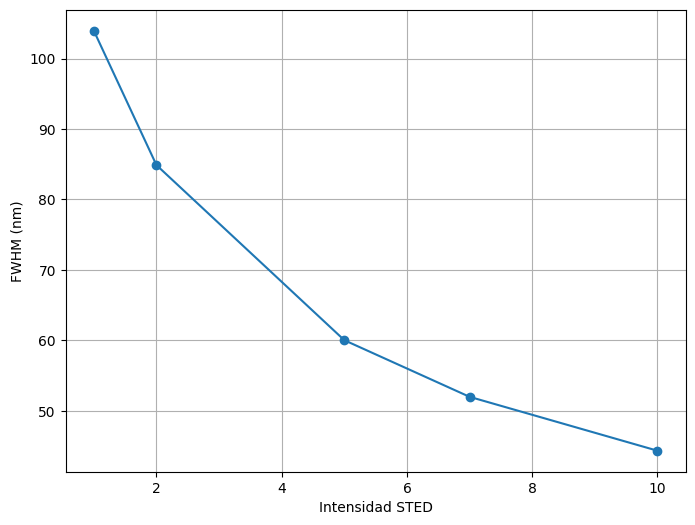

In [3]:
# Calcular FWHM para cada perfil STED
fwhm_values = []
for I, psf in zip(I_values, psf_sted):
    fwhm = compute_fwhm(r, psf)
    fwhm_values.append(fwhm)
    print(f"I_STED = {I} I_s: FWHM = {fwhm*1e9:.2f} nm")

# Graficar FWHM vs Intensidad STED
plt.figure(figsize=(8, 6))
plt.plot(I_values, np.array(fwhm_values)*1e9, marker='o', linestyle='-')
plt.xlabel("Intensidad STED")
plt.ylabel("FWHM (nm)")
plt.grid(True)
plt.show()

# Funciones de Bessel 1er y 2ndo tipo


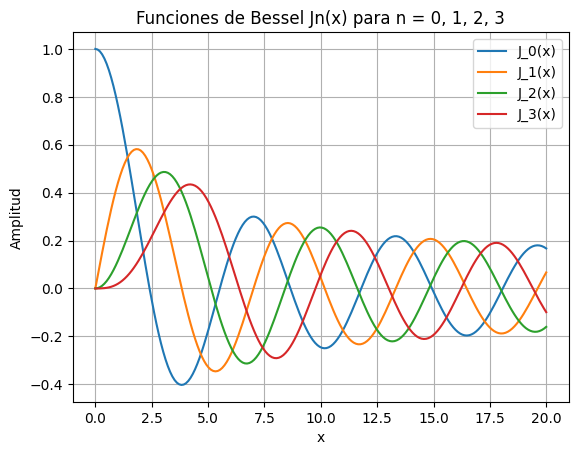

In [4]:
# Rango de valores de x
x = np.linspace(0, 20, 200)

# Órdenes de Bessel que queremos evaluar
ordenes = [0, 1, 2, 3]

plt.figure()
for n in ordenes:
    # Funciones de Bessel de primer tipo Jn(x)
    Jn = jn(n, x)
    plt.plot(x, Jn, label=f'J_{n}(x)')

plt.title('Funciones de Bessel Jn(x) para n = 0, 1, 2, 3')
plt.xlabel('x')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()


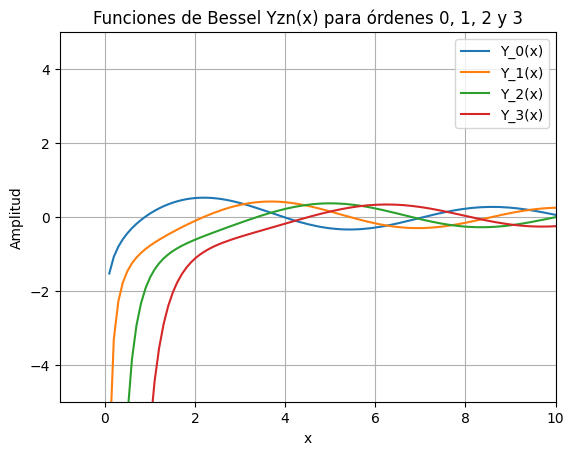

In [5]:
plt.figure()
for n in ordenes:
    # Funciones de Bessel de segundo tipo Yn(x)
    Yn = yn(n, x)
    plt.plot(x, Yn, label=f'Y_{n}(x)')


plt.xlim([-1, 10])
plt.ylim([-5, 5])

plt.title('Funciones de Bessel Yzn(x) para órdenes 0, 1, 2 y 3')
plt.xlabel('x')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()

# Lambdas

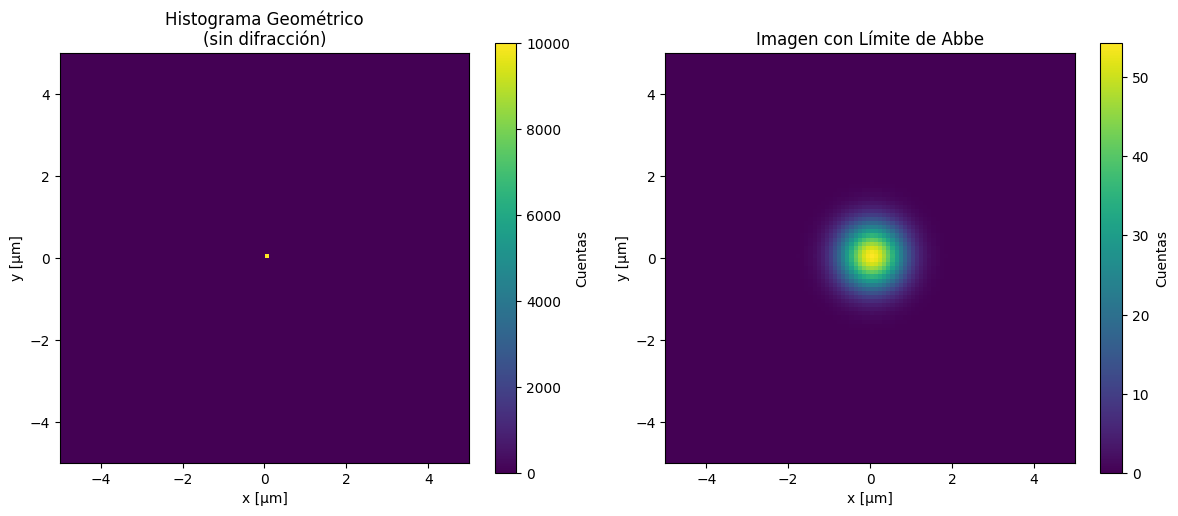

Parámetros del Sistema:
Distancia focal f = 50.0 mm
Diámetro de la lente D = 20.0 mm  =>  Radio R = 10.0 mm
Longitud de onda λ = 0.0005 mm
Apertura numérica NA ≈ 0.196
Límite de Abbe d ≈ 1.275 µm
Sigma (PSF gaussiana) ≈ 0.541 µm  =>  5.41 píxeles


In [6]:
# Parámetros (mm)
f = 50.0               # Distancia focal
D = 20.0               # Diámetro de la lente
R = D / 2.0            # Radio de la pupila 
lambda_light = 0.0005  # Longitud de onda (mm) = 0.5 µm (valor real para luz visible)
N = 10000              # Número de rayos

# Para una fuente puntual a infinito, la lente (posición z=0) enfoca todos los rayos en su plano focal (z=f)
# En óptica de rayos, la imagen es idealmente un punto.

# ================================
# 1. Generación de Rayos en la Pupila
# ================================
# Los rayos se distribuyen uniformemente en la pupila (círculo de radio R)
# Usamos la técnica de "muestreo en disco":
theta = np.random.uniform(0, 2*np.pi, N)
r = R * np.sqrt(np.random.uniform(0, 1, N))  # sqrt para distribución uniforme en área
x_pupil = r * np.cos(theta)
y_pupil = r * np.sin(theta)

hist_range = [[-0.005, 0.005],   # eje x en mm (±5 µm)
              [-0.005, 0.005]]   # eje y en mm (±5 µm)
bins = 100  # Número de píxeles en cada eje

# Como todos los rayos impactan en (0,0), asignamos (x_img, y_img) = (0,0) para todos
x_image = np.zeros(N)
y_image = np.zeros(N)

# Histograma 2D: la mayor parte de la cuenta se concentrará en el píxel central.
H, xedges, yedges = np.histogram2d(x_image, y_image, bins=bins, range=hist_range)


NA = R / np.sqrt(R**2 + f**2)
d_abbe = lambda_light / (2 * NA)  # mm

# Gaussiana 
sigma_mm = d_abbe / 2.355

# Ajustamos los píxeles
pixel_size = (xedges[-1] - xedges[0]) / bins  
sigma_pixels = sigma_mm / pixel_size

# Aplicamos la convolución gaussiana al histograma para simular el efecto de difracción.
H_blurred = gaussian_filter(H, sigma=sigma_pixels)



# Convertimos el eje de mm a µm para visualizar (1 mm = 1000 µm)
extent = [xedges[0]*1e3, xedges[-1]*1e3, yedges[0]*1e3, yedges[-1]*1e3]

fig, ax = plt.subplots(1, 2, figsize=(12, 5))


im0 = ax[0].imshow(H.T, origin='lower', extent=extent)
ax[0].set_title('Histograma Geométrico\n(sin difracción)')
ax[0].set_xlabel('x [µm]')
ax[0].set_ylabel('y [µm]')
fig.colorbar(im0, ax=ax[0], label='Cuentas')

im1 = ax[1].imshow(H_blurred.T, origin='lower', extent=extent)
ax[1].set_title('Imagen con Límite de Abbe')
ax[1].set_xlabel('x [µm]')
ax[1].set_ylabel('y [µm]')
fig.colorbar(im1, ax=ax[1], label='Cuentas')

plt.tight_layout()
plt.show()

# Parámetros
print("Parámetros del Sistema:")
print(f"Distancia focal f = {f} mm")
print(f"Diámetro de la lente D = {D} mm  =>  Radio R = {R} mm")
print(f"Longitud de onda λ = {lambda_light} mm")
print(f"Apertura numérica NA ≈ {NA:.3f}")
print(f"Límite de Abbe d ≈ {d_abbe*1e3:.3f} µm")
print(f"Sigma (PSF gaussiana) ≈ {sigma_mm*1e3:.3f} µm  =>  {sigma_pixels:.2f} píxeles")


/var/folders/66/y2szvxgj4clc_1t9497q86480000gn/T/ipykernel_13489/489344841.py:107: ComplexWarning: Casting complex values to real discards the imaginary part
  PSF_rgb[:,:,0] = H_norm * Rcol
/var/folders/66/y2szvxgj4clc_1t9497q86480000gn/T/ipykernel_13489/489344841.py:113: ComplexWarning: Casting complex values to real discards the imaginary part
  Geom_rgb[:,:,0] = Hgeom_norm * Rcol
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.2380078745987136..0.7084850415814243].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.2380078745987136..0.7084850415814243].


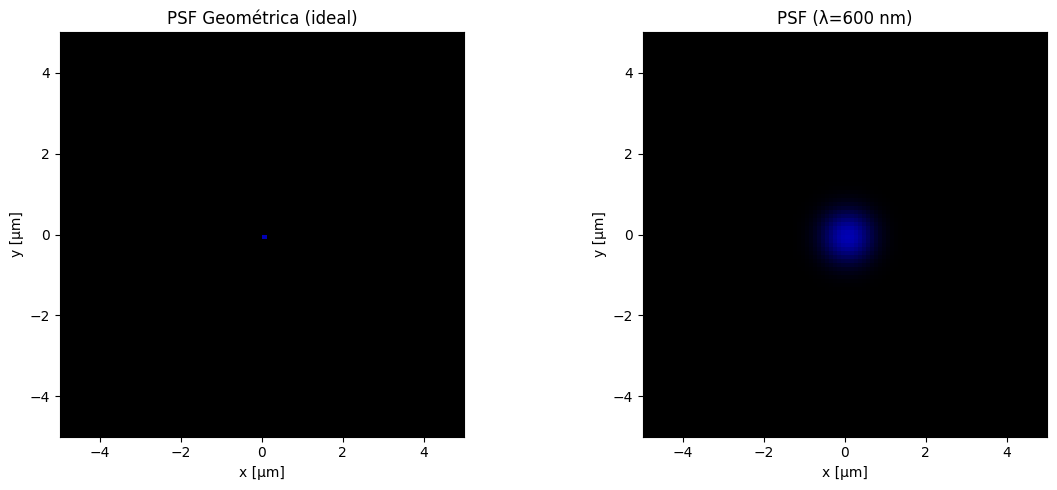

====== Parámetros ======
Distancia focal: f = 50.0 mm
Diámetro lente: D = 20.0 mm
Longitud de onda: 400.0 nm
Apertura Numérica (NA) ~ 0.196
Límite de Abbe d ~ 1.020 µm
PSF FWHM = 1.02 µm => sigma ~ 0.43 µm


In [7]:
# Para ponerles el color según lambda
def wavelength_to_rgb(wavelength_nm, gamma=0.8):

    wavelength = float(wavelength_nm)

    if wavelength < 380.0:
        wavelength = 380.0
    if wavelength > 780.0:
        wavelength = 780.0

    if 380.0 <= wavelength < 440.0:
        t = (wavelength - 380.0) / (440.0 - 380.0)
        R = -(t)
        G = 0.0
        B = 1.0
    elif 440.0 <= wavelength < 490.0:
        R = 0.0
        G = (wavelength - 440.0) / (490.0 - 440.0)
        B = 1.0
    elif 490.0 <= wavelength < 510.0:
        R = 0.0
        G = 1.0
        B = -(wavelength - 510.0) / (510.0 - 490.0)
    elif 510.0 <= wavelength < 580.0:
        R = (wavelength - 510.0) / (580.0 - 510.0)
        G = 1.0
        B = 0.0
    elif 580.0 <= wavelength < 645.0:
        R = 1.0
        G = -(wavelength - 645.0) / (645.0 - 580.0)
        B = 0.0
    elif 645.0 <= wavelength <= 780.0:
        R = 1.0
        G = 0.0
        B = 0.0
    else:
        # fuera de rango visible
        R = G = B = 0.0

    if 380.0 <= wavelength < 420.0:
        alpha = 0.3 + 0.7*(wavelength - 380.0)/(40.0)
    elif 700.0 < wavelength <= 780.0:
        alpha = 0.3 + 0.7*(780.0 - wavelength)/(80.0)
    else:
        alpha = 1.0

    R *= alpha
    G *= alpha
    B *= alpha

    # Corrección gamma (simple):
    R = R**gamma
    G = G**gamma
    B = B**gamma

    return (R, G, B)


f = 50.0        
D = 20.0       
R_lente = D/2.0
N = 20000       
lambda_nm = 400.0         
lambda_light = lambda_nm * 1e-6 


theta = np.random.uniform(0, 2*np.pi, N)
r = R_lente * np.sqrt(np.random.uniform(0, 1, N))
x_pupil = r * np.cos(theta)
y_pupil = r * np.sin(theta)


x_image_geom = np.zeros(N)
y_image_geom = np.zeros(N)


hist_range = [[-0.005, 0.005], 
              [-0.005, 0.005]]
bins = 100
H_geom, xedges, yedges = np.histogram2d(x_image_geom,
                                        y_image_geom,
                                        bins=bins,
                                        range=hist_range)


NA = R_lente / np.sqrt(R_lente**2 + f**2)
d_abbe = lambda_light / (2.0 * NA)  # mm


sigma_mm = d_abbe / 2.355

pixel_size = (xedges[-1] - xedges[0]) / bins
sigma_pix = sigma_mm / pixel_size

H_blurred = gaussian_filter(H_geom, sigma=sigma_pix)

H_max = H_blurred.max()
if H_max > 0:
    H_norm = H_blurred / H_max
else:
    H_norm = H_blurred


Rcol, Gcol, Bcol = wavelength_to_rgb(lambda_nm, gamma=0.8)

PSF_rgb = np.zeros((bins, bins, 3), dtype=float)
PSF_rgb[:,:,0] = H_norm * Rcol
PSF_rgb[:,:,1] = H_norm * Gcol
PSF_rgb[:,:,2] = H_norm * Bcol

Hgeom_norm = H_geom / H_geom.max() if H_geom.max()>0 else H_geom
Geom_rgb = np.zeros((bins, bins, 3), dtype=float)
Geom_rgb[:,:,0] = Hgeom_norm * Rcol
Geom_rgb[:,:,1] = Hgeom_norm * Gcol
Geom_rgb[:,:,2] = Hgeom_norm * Bcol

extent_um = [xedges[0]*1e3, xedges[-1]*1e3, yedges[0]*1e3, yedges[-1]*1e3]

fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].imshow(Geom_rgb[::-1,:,:], origin='lower', extent=extent_um)
ax[0].set_title("PSF Geométrica (ideal)")
ax[0].set_xlabel("x [µm]")
ax[0].set_ylabel("y [µm]")

ax[1].imshow(PSF_rgb[::-1,:,:], origin='lower', extent=extent_um)
ax[1].set_title("PSF (λ=600 nm)")
ax[1].set_xlabel("x [µm]")
ax[1].set_ylabel("y [µm]")

plt.tight_layout()
plt.show()

# Parámetros finales
print("====== Parámetros ======")
print(f"Distancia focal: f = {f} mm")
print(f"Diámetro lente: D = {D} mm")
print(f"Longitud de onda: {lambda_nm} nm")
print(f"Apertura Numérica (NA) ~ {NA:.3f}")
print(f"Límite de Abbe d ~ {d_abbe*1e3:.3f} µm")
print(f"PSF FWHM = {d_abbe*1e3:.2f} µm => sigma ~ {sigma_mm*1e3:.2f} µm")
print("========================")


# STED

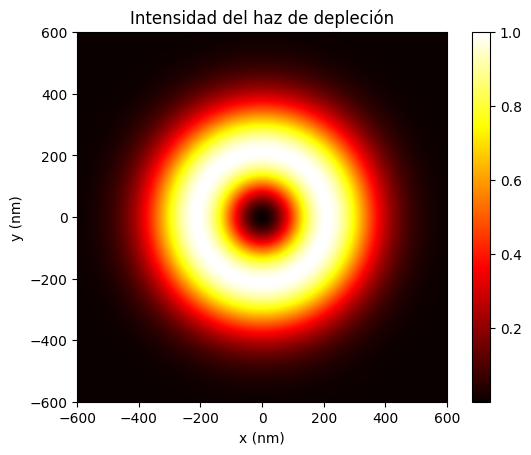

In [8]:

num_points = 500           
x_min, x_max = -600, 600   
y_min, y_max = -600, 600
x_vals = np.linspace(x_min, x_max, num_points)
y_vals = np.linspace(y_min, y_max, num_points)
X, Y = np.meshgrid(x_vals, y_vals)


R = np.sqrt(X**2 + Y**2)          
Theta = np.arctan2(Y, X)           

w = 300.0  # Cambia el radio del anillo



def intensity_donut(R, Theta, w):
    E = (R / w) * np.exp(-R**2 / w**2)
    return E**2


I_a = intensity_donut(R, Theta, w)
I_a /= I_a.max()
cm = 'hot'  

plt.figure()
im = plt.imshow(I_a, extent=[x_min, x_max, y_min, y_max], cmap=cm)
plt.colorbar(im)
plt.xlabel("x (nm)")
plt.ylabel("y (nm)")
plt.title("Intensidad del haz de depleción")
plt.show()

# Aberración con Taylor

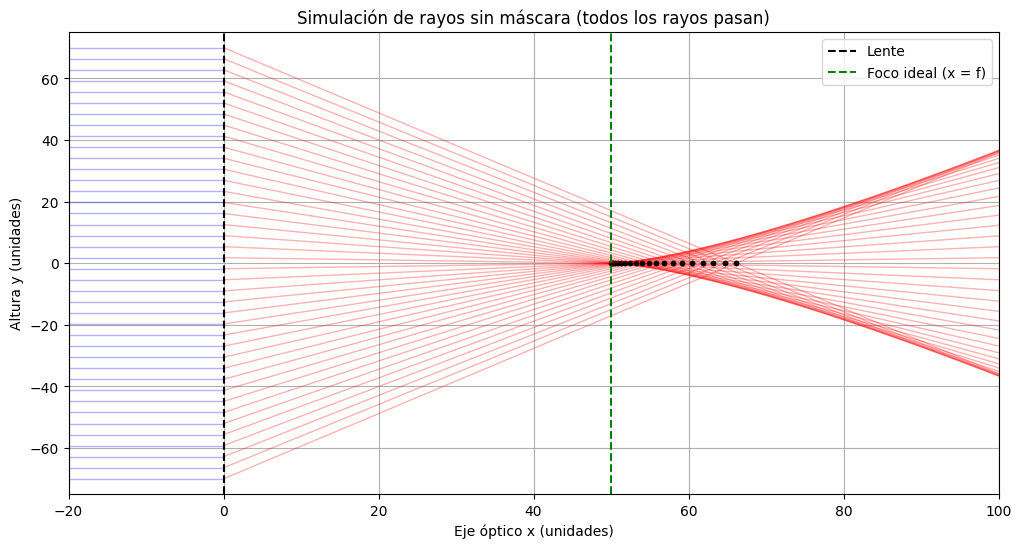

In [19]:
# Parámetros ajustados para que los rayos se crucen antes de la distancia focal
f = 50           # Distancia focal
x_lens = 0       # Posición de la lente
x_start = -100   # Inicio del rango en el eje X
x_end = 200      # Fin del rango en el eje X
y_max = 70       # Máxima altura de los rayos
num_rays = 40    # Número de rayos

# Configuración de la figura
plt.figure(figsize=(12, 6))
plt.title("Simulación de rayos sin máscara (todos los rayos pasan)")

# Valores de y0 para los rayos iniciales
y0_values = np.linspace(-y_max, y_max, num_rays)

# Expansión de Taylor para seno (hasta orden 7)
def expansion(theta):
    return theta - (theta**3) / 6 + (theta**5) / 120 - (theta**7) / 5040

# Trazado de rayos
for y0 in y0_values:
    x_pre = np.linspace(x_start, x_lens, 50)
    y_pre = np.full_like(x_pre, y0)
    plt.plot(x_pre, y_pre, 'b', lw=1, alpha=0.3)
    
    # Cálculo del ángulo tras la lente con corrección de aberración
    theta_ideal = np.arctan(-y0 / f)      # theta ideal sin aberración
    theta_eff   = expansion(theta_ideal)  # theta corregido (expansión)
    
    x_post = np.linspace(x_lens, x_end, 100)
    y_post = y0 + np.tan(theta_eff) * (x_post - x_lens)
    plt.plot(x_post, y_post, 'r', lw=1, alpha=0.3)
    
    # Punto de foco de cada rayo
    if np.tan(theta_eff) != 0:
        x_focus = x_lens - y0 / np.tan(theta_eff)
        plt.plot(x_focus, 0, 'ko', markersize=3)





plt.axvline(x=x_lens, color='k', linestyle='--', label='Lente')
plt.axvline(x=f, color='g', linestyle='--', label='Foco ideal (x = f)')
plt.xlabel("Eje óptico x (unidades)")
plt.ylabel("Altura y (unidades)")
plt.xlim(-20, 100)
plt.ylim(-75, 75)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


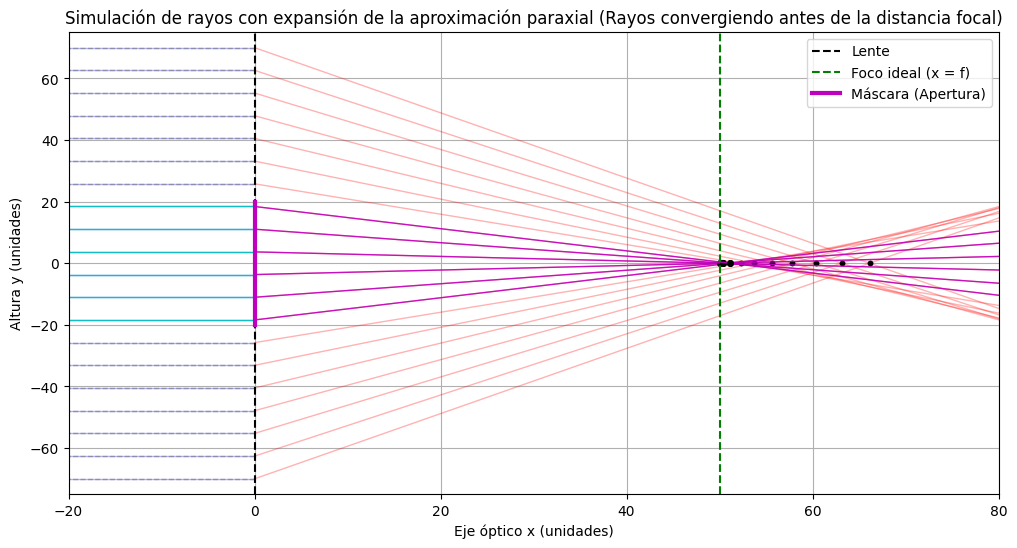

In [18]:
# Parámetros 
f = 50           # Distancia focal
x_lens = 0       # Posición de la lente
x_start = -100   # Inicio del rango en el eje X
x_end = 200      # Fin del rango en el eje X
y_max = 70       # Máxima altura de los rayos
num_rays = 20    # Número de rayos
aperture_stop = 40 # Tamaño de la máscara


plt.figure(figsize=(12, 6))
plt.title("Simulación de rayos con expansión de la aproximación paraxial (Rayos convergiendo antes de la distancia focal)")

# Valores para los rayos iniciales
y0_values = np.linspace(-y_max, y_max, num_rays)

# Expansión de Taylor
def expansion(theta):
    return theta - (theta**3) / 6 + (theta**5) / 120 - (theta**7) / 5040


for y0 in y0_values:
    
    x_pre = np.linspace(x_start, x_lens, 50)
    y_pre = np.full_like(x_pre, y0)
    plt.plot(x_pre, y_pre, 'b', lw=1, alpha=0.3)
    
    # Cálculo del ángulo ideal (sin aberración)
    theta_ideal = np.arctan(-y0 / f)  # theta ideal (sin aberración)
    theta_eff = expansion(theta_ideal)  # Usamos la expansión para la corrección

    x_post = np.linspace(x_lens, x_end, 100)
    y_post = y0 + np.tan(theta_eff) * (x_post - x_lens)
    plt.plot(x_post, y_post, 'r', lw=1, alpha=0.3)
    

    if np.tan(theta_eff) != 0:
        x_focus = x_lens - y0 / np.tan(theta_eff)
        plt.plot(x_focus, 0, 'ko', markersize=3)


for y0 in y0_values:
    if np.abs(y0) > aperture_stop:
        x_pre = np.linspace(x_start, x_lens, 50)
        y_pre = np.full_like(x_pre, y0)
        plt.plot(x_pre, y_pre, color='gray', lw=1, linestyle='--', alpha=0.7)
        continue  
    

    x_pre = np.linspace(x_start, x_lens, 50)
    y_pre = np.full_like(x_pre, y0)
    plt.plot(x_pre, y_pre, 'c', lw=1, alpha=0.9)

    # Desviación angular
    theta_ideal = np.arctan(-y0 / f)  # Ángulo ideal
    theta_eff = expansion(theta_ideal)  # Ángulo corregido usando la expansión

    

    x_post = np.linspace(x_lens, x_end, 100)
    y_post = y0 + np.tan(theta_eff) * (x_post - x_lens)
    plt.plot(x_post, y_post, 'm', lw=1, alpha=0.9)
    

    if np.tan(theta_eff) != 0:
        x_focus = x_lens - y0 / np.tan(theta_eff)
        plt.plot(x_focus, 0, 'ko', markersize=4)



plt.axvline(x=x_lens, color='k', linestyle='--', label='Lente')
plt.axvline(x=f, color='g', linestyle='--', label='Foco ideal (x = f)')
plt.plot([x_lens, x_lens], [aperture_stop, -aperture_stop], 'm-', lw=3, label='Máscara (Apertura)')
plt.xlabel("Eje óptico x (unidades)")
plt.ylabel("Altura y (unidades)")
plt.xlim(-20, 80)
plt.ylim(-75, 75)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [11]:
# Parámetros 
f = 50           # Distancia focal
x_lens = 0       # Posición de la lente
x_end = 200      # Fin del rango en el eje X
y_max = 70       # Máxima altura de los rayos


num_rays = 30


y0_values = np.linspace(-y_max, y_max, num_rays)

def sin_expansion(theta):
    return theta - (theta**3) / 6 + (theta**5) / 120 - (theta**7) / 5040

last_y0 = y0_values[-1]

theta_ideal_last = np.arctan(-last_y0 / f)  # Ángulo ideal (sin aberración)

theta_eff_last = sin_expansion(theta_ideal_last)  # Usamos la expansión para la corrección

def calculate_focus_before_f(y0, theta_eff):
    return x_lens - y0 / np.tan(theta_eff)

x_focus_last = calculate_focus_before_f(last_y0, theta_eff_last)

last_ray_distance = np.abs(last_y0)

last_ray_distance, x_focus_last



(70.0, 66.14158934250348)

Distancia del ultimo rayo 17,08 

Distancia último rayo en la máscara 5,23 

último punto 68

# Lente asférica

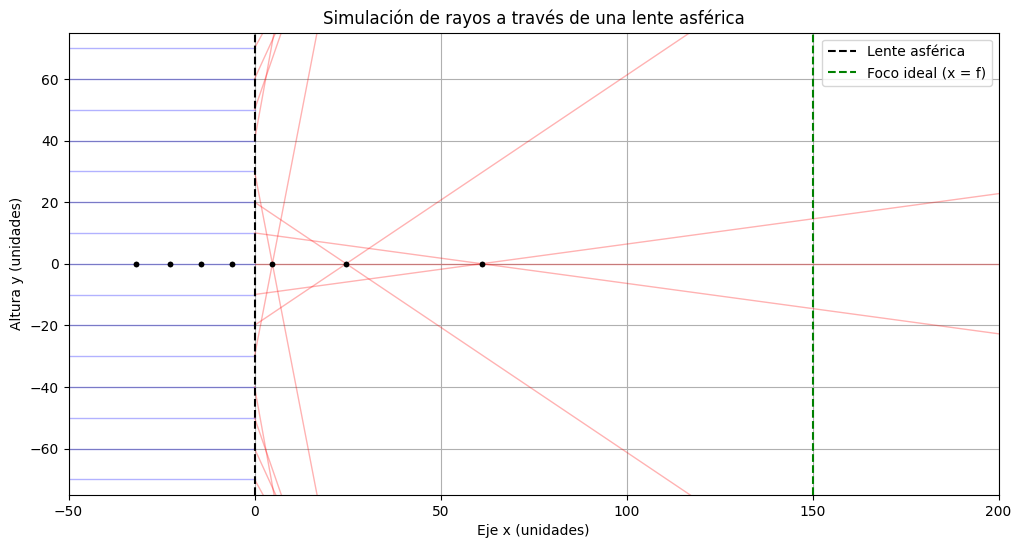

In [12]:

class LenteAsferica:
    def __init__(self, R, k, A4=0, A6=0, f=150, x=0):
        self.R = R
        self.k = k
        self.A4 = A4
        self.A6 = A6
        self.f = f
        self.x = x

    def sag(self, y):
       
        term = 1 - (1 + self.k) * (y / self.R)**2
        if term < 0:
            term = 0
        sqrt_term = np.sqrt(term)
        return (y**2) / (self.R * (1 + sqrt_term)) + self.A4 * y**4 + self.A6 * y**6

    def sag_derivative(self, y):
        
        eps = 1e-6
        return (self.sag(y + eps) - self.sag(y - eps)) / (2 * eps)

    def refract_angle(self, y0):
        
        theta_ideal = np.arctan(-y0 / self.f)
        phi = np.arctan(self.sag_derivative(y0))
        theta_effective = theta_ideal - phi
        return theta_effective

# Parámetros 
x_start = -100 
x_end = 300     
num_points_pre = 50
num_points_post = 100
num_rays = 15   
y_max = 70     


lente = LenteAsferica(R=200, k=-0.5, A4=1e-5, A6=1e-8, f=150, x=0)

plt.figure(figsize=(12, 6))
plt.title("Simulación de rayos a través de una lente asférica")

y0_values = np.linspace(-y_max, y_max, num_rays)

for y0 in y0_values:
    x_pre = np.linspace(x_start, lente.x, num_points_pre)
    y_pre = np.full_like(x_pre, y0)
    plt.plot(x_pre, y_pre, 'b', lw=1, alpha=0.3)
    
    theta = lente.refract_angle(y0)
    x_post = np.linspace(lente.x, x_end, num_points_post)
    y_post = y0 + np.tan(theta) * (x_post - lente.x)
    plt.plot(x_post, y_post, 'r', lw=1, alpha=0.3)
    
    if np.tan(theta) != 0:
        x_focus = lente.x - y0 / np.tan(theta)
        plt.plot(x_focus, 0, 'ko', markersize=3)

plt.axvline(x=lente.x, color='k', linestyle='--', label='Lente asférica')
plt.axvline(x=lente.f, color='g', linestyle='--', label='Foco ideal (x = f)')

plt.xlabel("Eje x (unidades)")
plt.ylabel("Altura y (unidades)")
plt.xlim(-50, 200)
plt.ylim(-75, 75)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


# CW vs pulsed

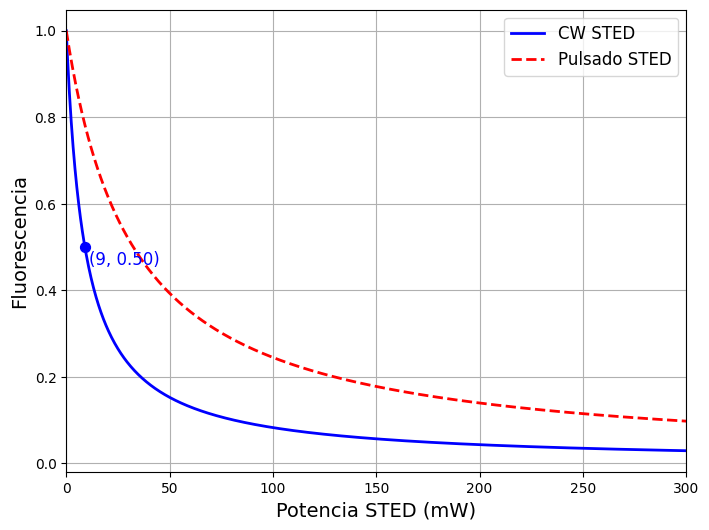

In [13]:
# Parámetros
g = 1/9  # Para que N1(9 mW) ≈ 0.5 en modo CW

# mW
P = np.linspace(0, 300, 1000)


# CW
N1_CW = 1 / (1 + g * P)

# Pulsado
N1_pulsed = 1 / (1 + g * (P / 3.6))

plt.figure(figsize=(8, 6))
plt.plot(P, N1_CW, label='CW STED', color='blue', linewidth=2)
plt.plot(P, N1_pulsed, label='Pulsado STED', color='red', linestyle='--', linewidth=2)

punto_x = 9
punto_y = 1 / (1 + g * punto_x)  # Esto da 0.5
plt.scatter(punto_x, punto_y, color='blue', s=50, zorder=5)
plt.text(punto_x +2, punto_y - 0.04, f'({punto_x}, {punto_y:.2f})', fontsize=12, color='blue')

plt.xlabel('Potencia STED (mW)', fontsize=14)
plt.ylabel('Fluorescencia', fontsize=14)
plt.legend(fontsize=12)
plt.xlim(0,300)
plt.grid(True)
plt.show()


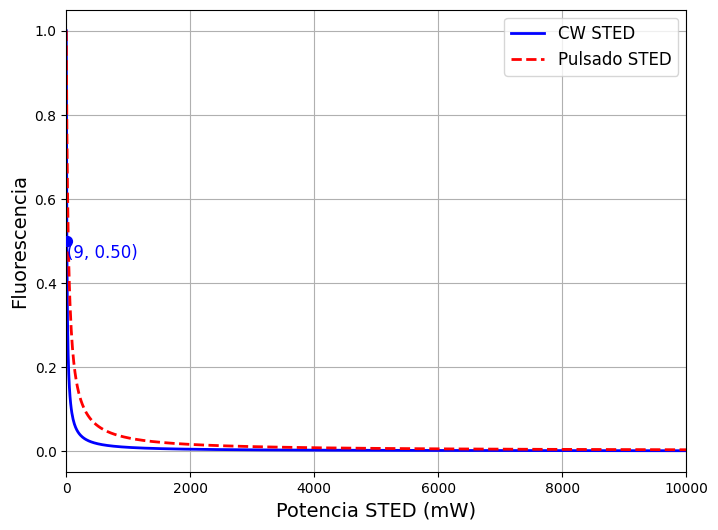

In [14]:
# Parámetros
g = 1/9  # Para que N1(9 mW) ≈ 0.5 en modo CW

# mW
P = np.linspace(0, 10000, 1000)


# CW
N1_CW = 1 / (1 + g * P)

# Pulsado
N1_pulsed = 1 / (1 + g * (P / 3.6))

plt.figure(figsize=(8, 6))
plt.plot(P, N1_CW, label='CW STED', color='blue', linewidth=2)
plt.plot(P, N1_pulsed, label='Pulsado STED', color='red', linestyle='--', linewidth=2)

punto_x = 9
punto_y = 1 / (1 + g * punto_x)  # Esto da 0.5
plt.scatter(punto_x, punto_y, color='blue', s=50, zorder=5)
plt.text(punto_x +2, punto_y - 0.04, f'({punto_x}, {punto_y:.2f})', fontsize=12, color='blue')

plt.xlabel('Potencia STED (mW)', fontsize=14)
plt.ylabel('Fluorescencia', fontsize=14)
plt.legend(fontsize=12)
plt.xlim(0,10000)
plt.grid(True)
plt.show()


# Photobleaching

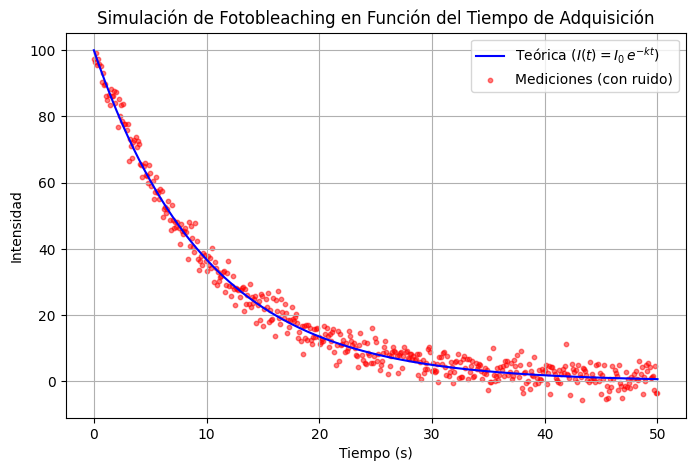

In [15]:
# Parámetros
I0 = 100            
k = 0.1             # Constante de fotobleaching [1/s]
t_max = 50          # Tiempo máximo
n_points = 500      # Número de puntos 


tiempo = np.linspace(0, t_max, n_points)

# Curva fotobleaching sin ruido (modelo exponencial)
intensidad_teorica = I0 * np.exp(-k * tiempo)

# Añadir ruido pulso gaussiano
ruido = np.random.normal(0, 3, tiempo.shape)
intensidad_medida = intensidad_teorica + ruido

plt.figure(figsize=(8, 5))
plt.plot(tiempo, intensidad_teorica, 'b-', label='Teórica ($I(t)=I_0\\,e^{-kt}$)')
plt.scatter(tiempo, intensidad_medida, s=10, color='r', alpha=0.5, label='Mediciones (con ruido)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Intensidad')
plt.title('Simulación de Fotobleaching en Función del Tiempo de Adquisición')
plt.legend()
plt.grid(True)
plt.show()

